## Preparing the Data
<span  style="color:purple; font-size:25px">
Loading the Data
</span>

In [574]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

In [575]:
building = pd.read_csv('Datasets/building.csv')
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   strap                   3957 non-null   object 
 1   bld_num                 3957 non-null   int64  
 2   effective_year_built    3957 non-null   int64  
 3   design_code             3957 non-null   int64  
 4   design                  3957 non-null   object 
 5   quality                 3957 non-null   object 
 6   quality_code            3957 non-null   int64  
 7   bldg_class_code         3957 non-null   int64  
 8   bldg_class              3957 non-null   object 
 9   construction_type_code  3743 non-null   float64
 10  construction_type       3736 non-null   object 
 11  nbr_bed_room            3957 non-null   float64
 12  nbr_full_baths          3957 non-null   float64
 13  nbr_three_qtr_baths     3957 non-null   float64
 14  nbr_half_baths          3957 non-null   

In [576]:
land = pd.read_csv('Datasets/land.csv')
land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   strap            3433 non-null   object 
 1   land_class       3433 non-null   int64  
 2   land_class_dscr  3433 non-null   object 
 3   sqft             3433 non-null   int64  
 4   acreage          3433 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 134.2+ KB


In [577]:
property = pd.read_csv('Datasets/property.csv')
property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   strap           3431 non-null   object 
 1   market_area     3431 non-null   int64  
 2   address         3431 non-null   object 
 3   unincorporated  3431 non-null   bool   
 4   sub_code        3431 non-null   int64  
 5   sub_dscr        3431 non-null   object 
 6   section         3431 non-null   int64  
 7   township        3431 non-null   object 
 8   range           3431 non-null   int64  
 9   mill_levy       3431 non-null   float64
 10  folio           3431 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 271.5+ KB


In [578]:
sales = pd.read_csv('Datasets/sales.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   strap             9598 non-null   object
 1   transaction_date  9598 non-null   object
 2   sales_cd          9598 non-null   object
 3   sales_cd_dscr     9598 non-null   object
 4   price             9598 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 375.0+ KB


In [579]:
time_trend_adj = pd.read_csv('Datasets/time_trend_adjustments.csv')
time_trend_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       60 non-null     int64  
 1   year             60 non-null     int64  
 2   month            60 non-null     int64  
 3   market_area_101  60 non-null     float64
 4   market_area_102  60 non-null     float64
 5   market_area_103  60 non-null     float64
 6   market_area_104  60 non-null     float64
 7   market_area_105  60 non-null     float64
 8   market_area_106  60 non-null     float64
 9   market_area_107  60 non-null     float64
 10  market_area_108  60 non-null     float64
 11  market_area_109  60 non-null     float64
dtypes: float64(9), int64(3)
memory usage: 5.8 KB


In [580]:
valuations = pd.read_csv('Datasets/valuations.csv')
valuations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   strap                3431 non-null   object 
 1   tax_yr               3431 non-null   int64  
 2   bld_appraised_val    3431 non-null   int64  
 3   land_appraised_val   3431 non-null   int64  
 4   total_appraised_val  3431 non-null   int64  
 5   bld_assessed_val     3429 non-null   float64
 6   land_assessed_val    0 non-null      float64
 7   total_assessed_val   3431 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 214.6+ KB


<span  style="color:purple; font-size:25px">
Tidying the Data
</span>

#### Datetimes

In [581]:
# Note that the dates in `time_trend_adj` and `sales` are not datetime data types.  Let's correct that using `pd.to_datetime`
# and assign missing day values to 1.

time_trend_adj['date'] = pd.to_datetime(time_trend_adj[['year', 'month']].assign(day = 1))

In [582]:
# Now remove the redundant columns.
time_trend_adj.drop(columns = ['year', 'month', 'Unnamed: 0'], inplace = True)
time_trend_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   market_area_101  60 non-null     float64       
 1   market_area_102  60 non-null     float64       
 2   market_area_103  60 non-null     float64       
 3   market_area_104  60 non-null     float64       
 4   market_area_105  60 non-null     float64       
 5   market_area_106  60 non-null     float64       
 6   market_area_107  60 non-null     float64       
 7   market_area_108  60 non-null     float64       
 8   market_area_109  60 non-null     float64       
 9   date             60 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(9)
memory usage: 4.8 KB


In [583]:
# Now do the same for the `sales` data frame.
sales['date'] = pd.to_datetime(sales['transaction_date'])
sales.drop(columns = 'transaction_date', inplace = True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9598 entries, 0 to 9597
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   strap          9598 non-null   object        
 1   sales_cd       9598 non-null   object        
 2   sales_cd_dscr  9598 non-null   object        
 3   price          9598 non-null   int64         
 4   date           9598 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 375.0+ KB


#### Preparing the Market Adjustments

In [584]:
# Let's look at the `time_trend_adj` data
time_trend_adj.head()

,market_area_101,market_area_102,market_area_103,market_area_104,market_area_105,market_area_106,market_area_107,market_area_108,market_area_109,date
0,1.4591,1.6070,1.6384,1.5174,1.5532,1.5728,1.5938,1.2996,1.4132,2017-07-01
1,1.4485,1.5989,1.6288,1.5075,1.5481,1.5654,1.5830,1.2996,1.4132,2017-08-01
2,1.4379,1.5908,1.6193,1.4977,1.5430,1.5579,1.5723,1.2996,1.4132,2017-09-01
3,1.4273,1.5828,1.6099,1.4880,1.5379,1.5505,1.5616,1.2996,1.3913,2017-10-01
4,1.4169,1.5748,1.6005,1.4783,1.5329,1.5431,1.5510,1.2996,1.3840,2017-11-01


In order to merge this data frame with `sales` to create an adjusted sales price, we need to change this so there are `market_area`
and `multiplier` columns

In [585]:
time_trend_adj_clean = time_trend_adj.melt(id_vars = 'date',
                                           var_name = 'market_area',
                                           value_name = 'multiplier')

time_trend_adj_clean

,date,market_area,multiplier
0,2017-07-01,market_area_101,1.4591
1,2017-08-01,market_area_101,1.4485
2,2017-09-01,market_area_101,1.4379
3,2017-10-01,market_area_101,1.4273
4,2017-11-01,market_area_101,1.4169
...,...,...,...
535,2022-02-01,market_area_109,1.0296
536,2022-03-01,market_area_109,1.0147
537,2022-04-01,market_area_109,1.0000
538,2022-05-01,market_area_109,1.0000


In [586]:
# Now use regular expressions to extract the market area number
time_trend_adj_clean['market_area'] = time_trend_adj_clean['market_area'].str.extract(r'(\d+)$').astype(int)
time_trend_adj_clean

,date,market_area,multiplier
0,2017-07-01,101,1.4591
1,2017-08-01,101,1.4485
2,2017-09-01,101,1.4379
3,2017-10-01,101,1.4273
4,2017-11-01,101,1.4169
...,...,...,...
535,2022-02-01,109,1.0296
536,2022-03-01,109,1.0147
537,2022-04-01,109,1.0000
538,2022-05-01,109,1.0000


#### Adjusting the Sales Prices

In [587]:
# Merge the `sales` and `property` data frames to prepare for a row-wise calculation
sales_w_market_area = sales.merge(property[['strap', 'market_area']],
                                  on = 'strap',
                                  how = 'left')
sales_w_market_area

,strap,sales_cd,sales_cd_dscr,price,date,market_area
0,R0000008,Q,qualified,65000,1978-01-03,102
1,R0000019,U,unqualified,75000,1980-08-13,109
2,R0000019,U,unqualified,110600,1985-04-08,109
3,R0000019,Q,qualified,126400,1992-04-22,109
4,R0000019,Q,qualified,332000,2000-06-02,109
...,...,...,...,...,...,...
9593,R0610553,Q,qualified,2872600,2021-07-06,102
9594,R0610553,Q,qualified,3450000,2023-02-09,102
9595,R0612718,U,unqualified,910000,2021-05-10,109
9596,R0613548,Q,qualified,850000,2020-09-14,102


In [588]:
# After attempting to merge this column with `time_trend_adj_clean` using the `date` (as datetime) and `market_area` columns,
# we ran into issues with many new untidy columns being created.

# Therefore, we will create `year` and `month` columns for each data frame and use them to merge our final two data frames

sales_w_market_area['year'] = sales_w_market_area['date'].dt.year
sales_w_market_area['month'] = sales_w_market_area['date'].dt.month
sales_w_market_area

,strap,sales_cd,sales_cd_dscr,price,date,market_area,year,month
0,R0000008,Q,qualified,65000,1978-01-03,102,1978,1
1,R0000019,U,unqualified,75000,1980-08-13,109,1980,8
2,R0000019,U,unqualified,110600,1985-04-08,109,1985,4
3,R0000019,Q,qualified,126400,1992-04-22,109,1992,4
4,R0000019,Q,qualified,332000,2000-06-02,109,2000,6
...,...,...,...,...,...,...,...,...
9593,R0610553,Q,qualified,2872600,2021-07-06,102,2021,7
9594,R0610553,Q,qualified,3450000,2023-02-09,102,2023,2
9595,R0612718,U,unqualified,910000,2021-05-10,109,2021,5
9596,R0613548,Q,qualified,850000,2020-09-14,102,2020,9


In [589]:
# Now do the same for `time_trend_adj_clean`

time_trend_adj_clean['year'] = time_trend_adj_clean['date'].dt.year
time_trend_adj_clean['month'] = time_trend_adj_clean['date'].dt.month
time_trend_adj_clean

,date,market_area,multiplier,year,month
0,2017-07-01,101,1.4591,2017,7
1,2017-08-01,101,1.4485,2017,8
2,2017-09-01,101,1.4379,2017,9
3,2017-10-01,101,1.4273,2017,10
4,2017-11-01,101,1.4169,2017,11
...,...,...,...,...,...
535,2022-02-01,109,1.0296,2022,2
536,2022-03-01,109,1.0147,2022,3
537,2022-04-01,109,1.0000,2022,4
538,2022-05-01,109,1.0000,2022,5


In [590]:
time_trend_adj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         540 non-null    datetime64[ns]
 1   market_area  540 non-null    int32         
 2   multiplier   540 non-null    float64       
 3   year         540 non-null    int64         
 4   month        540 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 19.1 KB


In [591]:
# Now merge this with the `time_trend_adj_clean` data frame to add in the multiplier
sales_w_mult = sales_w_market_area.merge(time_trend_adj_clean[['year', 'month', 'market_area', 'multiplier']],
                                         on = ['year', 'month', 'market_area'],
                                         how = 'left').drop(columns = ['year', 'month'])
sales_w_mult

,strap,sales_cd,sales_cd_dscr,price,date,market_area,multiplier
0,R0000008,Q,qualified,65000,1978-01-03,102,NaN
1,R0000019,U,unqualified,75000,1980-08-13,109,NaN
2,R0000019,U,unqualified,110600,1985-04-08,109,NaN
3,R0000019,Q,qualified,126400,1992-04-22,109,NaN
4,R0000019,Q,qualified,332000,2000-06-02,109,NaN
...,...,...,...,...,...,...,...
9593,R0610553,Q,qualified,2872600,2021-07-06,102,1.2167
9594,R0610553,Q,qualified,3450000,2023-02-09,102,NaN
9595,R0612718,U,unqualified,910000,2021-05-10,109,1.1910
9596,R0613548,Q,qualified,850000,2020-09-14,102,1.3453


Now that we have all the necessary columns in one data frame, we can create a column for the adjusted sales price

In [592]:
sales_w_mult['adjusted_sales_price'] = np.where(sales_w_mult['multiplier'].isnull(), 
                                                sales_w_mult['price'],
                                                sales_w_mult['price'] * sales_w_mult['multiplier']).astype(int)
sales_w_mult

,strap,sales_cd,sales_cd_dscr,price,date,market_area,multiplier,adjusted_sales_price
0,R0000008,Q,qualified,65000,1978-01-03,102,NaN,65000
1,R0000019,U,unqualified,75000,1980-08-13,109,NaN,75000
2,R0000019,U,unqualified,110600,1985-04-08,109,NaN,110600
3,R0000019,Q,qualified,126400,1992-04-22,109,NaN,126400
4,R0000019,Q,qualified,332000,2000-06-02,109,NaN,332000
...,...,...,...,...,...,...,...,...
9593,R0610553,Q,qualified,2872600,2021-07-06,102,1.2167,3495092
9594,R0610553,Q,qualified,3450000,2023-02-09,102,NaN,3450000
9595,R0612718,U,unqualified,910000,2021-05-10,109,1.1910,1083810
9596,R0613548,Q,qualified,850000,2020-09-14,102,1.3453,1143505


#### Ensuring the Rest of the Data is Tidy

##### `Valuations`

In [593]:
valuations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   strap                3431 non-null   object 
 1   tax_yr               3431 non-null   int64  
 2   bld_appraised_val    3431 non-null   int64  
 3   land_appraised_val   3431 non-null   int64  
 4   total_appraised_val  3431 non-null   int64  
 5   bld_assessed_val     3429 non-null   float64
 6   land_assessed_val    0 non-null      float64
 7   total_assessed_val   3431 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 214.6+ KB


`land_assessed_val` has no non-null values, but we know that `total_assessed_val` is the sum of it and `bld_assessed_val`, so we can fill in the NA values with their proper amounts.  There are two buildings that have a non-null `total_assessed_val`, but a null `bld_assessed_val`.  Since we still have the total, we will still keep these records.

In [594]:
valuations['land_assessed_val'] = valuations['total_assessed_val'] - valuations['bld_assessed_val']
valuations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3431 entries, 0 to 3430
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   strap                3431 non-null   object 
 1   tax_yr               3431 non-null   int64  
 2   bld_appraised_val    3431 non-null   int64  
 3   land_appraised_val   3431 non-null   int64  
 4   total_appraised_val  3431 non-null   int64  
 5   bld_assessed_val     3429 non-null   float64
 6   land_assessed_val    3429 non-null   float64
 7   total_assessed_val   3431 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 214.6+ KB


In [595]:
# Our code appears to have worked, but let's look at a few examples to be sure
valuations.sample(5)

,strap,tax_yr,bld_appraised_val,land_appraised_val,total_appraised_val,bld_assessed_val,land_assessed_val,total_assessed_val
2605,R0008343,2024,98880,889920,988800,6625.0,55940.0,62565
820,R0002763,2024,215820,1942380,2158200,14460.0,126454.0,140914
472,R0001526,2024,272000,1199300,1471300,18224.0,76668.0,94892
407,R0001280,2024,208660,1877940,2086600,13980.0,122137.0,136117
2733,R0008738,2024,606500,692600,1299100,40636.0,42719.0,83355


##### `Property`

In [596]:
property.sample(10)

,strap,market_area,address,unincorporated,sub_code,sub_dscr,section,township,range,mill_levy,folio
3066,R0081573,109,"2916 SHADY HOLLOW WEST , BOULDER CO",False,7183,SHADY HOLLOW TOWNHOUSES - BO,29,1N,70,86.359,146329219029
1834,R0006014,103,"949 8TH ST, BOULDER CO",False,8675,WEST ROSE HILL - BO,36,1N,71,86.359,146136410013
1119,R0003712,102,"1036 12TH ST, BOULDER CO",False,8343,UNIVERSITY PLACE - BO,31,1N,70,86.359,146331339003
1108,R0003673,102,"335 16TH ST, BOULDER CO",False,3822,INTERURBAN PARK - BO,6,1S,70,86.359,157706213008
2170,R0007034,102,"935 12TH ST, BOULDER CO",False,8343,UNIVERSITY PLACE - BO,31,1N,70,86.359,146331314013
1358,R0004486,103,"415 COLLEGE AVE, BOULDER CO",False,4001,KECOUGHTAN HILLS - BO,36,1N,71,86.359,146136142007
2231,R0007241,107,"445 PINE ST, BOULDER CO",False,4888,MAPLETON - BO,25,1N,71,86.359,146125413011
1244,R0004097,102,"925 16TH ST, BOULDER CO",False,8343,UNIVERSITY PLACE - BO,31,1N,70,86.359,146331318012
2848,R0009061,103,"701 7TH ST, BOULDER CO",False,1469,CHAUTAUQUA HEIGHTS - BO,36,1N,71,86.359,146136423006
3174,R0099223,103,"863 CIRCLE DR, BOULDER CO",False,2567,FLATIRONS PARK - BO,36,1N,71,86.359,146136432006


The `property` data set appears to be tidy

##### `Land`

In [597]:
land.sample(10)

,strap,land_class,land_class_dscr,sqft,acreage
2783,R0008894,1112,SINGLE FAM.RES.-LAND,13381,0.307
2682,R0008546,1112,SINGLE FAM.RES.-LAND,11408,0.262
3141,R0089603,1112,SINGLE FAM.RES.-LAND,3714,0.085
1191,R0003919,1112,SINGLE FAM.RES.-LAND,11744,0.270
2660,R0008499,1112,SINGLE FAM.RES.-LAND,7332,0.168
3165,R0096395,1112,SINGLE FAM.RES.-LAND,7571,0.174
2995,R0068782,1112,SINGLE FAM.RES.-LAND,2570,0.059
3202,R0104220,1112,SINGLE FAM.RES.-LAND,5485,0.126
2578,R0008276,1112,SINGLE FAM.RES.-LAND,6748,0.155
190,R0000597,1112,SINGLE FAM.RES.-LAND,6946,0.159


In [598]:
land['land_class_dscr'].value_counts()

SINGLE FAM.RES.-LAND    2927
DUP/TRIPLEXES-LAND       503
MANUF HOME PARK LAND       2
VACANT RES LOTS            1
Name: land_class_dscr, dtype: int64

The `land` data set appears to be tidy

##### `Building`

In [599]:
building.sample(10)

,strap,bld_num,effective_year_built,design_code,design,quality,quality_code,bldg_class_code,bldg_class,construction_type_code,...,mainfloor_sqft,bsmt_sqft,bsmt_type_code,bsmt_type,car_storage_type_code,car_storage_type,ext_wall_code,ext_wall,ac,heating
2007,R0005653,1,1960,10,1 Story - Ranch,AVERAGE,30,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,908.0,NaN,NaN,NaN,GRD,DETACHED GARAGE,70.0,Brick on Block,False,True
2019,R0005685,1,1970,10,1 Story - Ranch,AVERAGE,30,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,1078.0,NaN,NaN,NaN,NaN,NaN,70.0,Brick on Block,False,True
554,R0001488,2,1990,60,Studio,AVERAGE,30,1212,SINGLE FAM RES IMPROVEMENTS,310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Frame Wood/Shake,False,True
1140,R0003270,1,1975,10,1 Story - Ranch,AVERAGE,30,1212,SINGLE FAM RES IMPROVEMENTS,310.0,...,1038.0,NaN,NaN,NaN,GRD,DETACHED GARAGE,10.0,Frame Wood/Shake,False,True
2798,R0007687,1,1948,10,1 Story - Ranch,AVERAGE,30,1212,SINGLE FAM RES IMPROVEMENTS,310.0,...,1076.0,644.0,BGF,GARDEN BASEMENT FINISHED AREA,GRB,BASEMENT GARAGE AREA,30.0,Frame Stucco,False,True
451,R0001171,1,1975,10,1 Story - Ranch,AVERAGE,30,1212,SINGLE FAM RES IMPROVEMENTS,310.0,...,1052.0,614.0,BSF,SUBTERRANEAN BASEMENT FINISHED AREA,GRW,"GARAGE SET UP AS A WORKSHOP (ELEC., ETC.) AREA",10.0,Frame Wood/Shake,False,True
2818,R0007740,1,1975,20,2-3 Story,GOOD ++,42,1215,DUP/TRIPLEX IMPROVEMENTS,320.0,...,1678.0,462.0,BSU,SUBTERRANEAN BASEMENT UNFINISHED AREA,GRD,DETACHED GARAGE,70.0,Brick on Block,False,True
3368,R0009177,2,1980,60,Studio,VERY GOOD,50,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,NaN,NaN,NaN,NaN,GRA,ATTACHED GARAGE AREA,70.0,Brick on Block,False,True
1378,R0003871,1,1975,10,1 Story - Ranch,AVERAGE,30,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,936.0,468.0,BSF,SUBTERRANEAN BASEMENT FINISHED AREA,NaN,NaN,40.0,Brick Veneer,False,True
3112,R0008515,1,1994,10,1 Story - Ranch,GOOD,40,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,2142.0,NaN,NaN,NaN,GRC,CARPORT AREA,40.0,Brick Veneer,False,True


Some entries are capitalized title-style and some are all uppercase. For consistancy and regex simplicity, we will make them all uppercase

In [600]:
building = building.applymap(lambda x: x.upper() if isinstance(x, str) else x)
building.sample(5)

,strap,bld_num,effective_year_built,design_code,design,quality,quality_code,bldg_class_code,bldg_class,construction_type_code,...,mainfloor_sqft,bsmt_sqft,bsmt_type_code,bsmt_type,car_storage_type_code,car_storage_type,ext_wall_code,ext_wall,ac,heating
2659,R0007358,1,1985,20,2-3 STORY,AVERAGE ++,32,1212,SINGLE FAM RES IMPROVEMENTS,310.0,...,924.0,NaN,NaN,NaN,GRC,CARPORT AREA,10.0,FRAME WOOD/SHAKE,False,True
3333,R0009070,1,1993,20,2-3 STORY,VERY GOOD +,51,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,1248.0,NaN,NaN,NaN,NaN,NaN,70.0,BRICK ON BLOCK,True,True
1117,R0003229,1,1988,10,1 STORY - RANCH,GOOD ++,42,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,2395.0,NaN,NaN,NaN,GRB,BASEMENT GARAGE AREA,100.0,MOSS ROCK/FLAGSTONE,True,True
2714,R0007481,1,1990,20,2-3 STORY,VERY GOOD +,51,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,1200.0,600.0,BSF,SUBTERRANEAN BASEMENT FINISHED AREA,NaN,NaN,70.0,BRICK ON BLOCK,False,True
1269,R0003564,2,1940,472,EQUIPMENT SHED,AVERAGE,30,1215,DUP/TRIPLEX IMPROVEMENTS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False


<span  style="color:purple; font-size:25px">
Adding New Features to the Data
</span>

##### Finished Basements

One of the central features that the legislators wanted us to look at was whether or not homes have finished basements, and how i could affect home value.

In [601]:
# Let's examine the different values of basement types that have been recorded
building['bsmt_type'].value_counts()

SUBTERRANEAN BASEMENT FINISHED AREA           965
SUBTERRANEAN BASEMENT UNFINISHED AREA         538
WALK-OUT BASEMENT FINISHED AREA               440
GARDEN BASEMENT FINISHED AREA                 184
LOWER LVL GARDEN FINISHED (BI-SPLIT LVL)       54
WALK-OUT BASEMENT UNFINISHED AREA              31
LOWER LVL WALKOUT FINISHED (BI-SPLIT LVL)      15
GARDEN BASEMENT UNFINISHED AREA                12
LOWER LVL GARDEN UNFINISHED (BI-SPLIT LVL)      2
Name: bsmt_type, dtype: int64

In [602]:
building['bsmt_type_code'].value_counts()

BSF    965
BSU    538
BWF    440
BGF    184
LGF     54
BWU     31
LWF     15
BGU     12
LGU      2
Name: bsmt_type_code, dtype: int64

Since basements are explicitly labeled as "finished" or "unfinished", and their codes end in "F" or "U" accordingly, we can create a boolean column to quickly show whether each building has a finished basement.

In [603]:
building['bsmt_finished'] = np.where(building['bsmt_type_code'].str.contains(r'U$', na = False) | building['bsmt_type_code'].isna(),
                                     False,
                                     True)

In [604]:
# Verify that it this column was properly created by running this code multiple times and verifying
building[['bsmt_type_code', 'bsmt_type', 'bsmt_finished']].sample(10)

,bsmt_type_code,bsmt_type,bsmt_finished
3502,NaN,NaN,False
423,NaN,NaN,False
355,BWF,WALK-OUT BASEMENT FINISHED AREA,True
389,NaN,NaN,False
2632,NaN,NaN,False
147,BSU,SUBTERRANEAN BASEMENT UNFINISHED AREA,False
2873,NaN,NaN,False
2083,NaN,NaN,False
2613,NaN,NaN,False
352,BWF,WALK-OUT BASEMENT FINISHED AREA,True


##### Number of Houses on the Property

Another factor in determining the value of a home is how many buildings are on the property.  We will create a column to record this data.

In [605]:
# How many occurences are there of multiple buildings on a property? What is the proportion?
print(building['bld_num'].value_counts())
print(building['bld_num'].value_counts().iloc[1:4].sum())
building['bld_num'].value_counts().iloc[1:4].sum() / building['bld_num'].value_counts().sum()

1    3429
2     496
3      30
4       2
Name: bld_num, dtype: int64
528


0.133434420015163

Approximately 13.3% (528 properties) of the properties have multiple buildings, enough that to analyze this further.

In [606]:
# Create the `num_buildings` column and populate it with the count of each property (strap)
building['num_buildings'] = building.groupby('strap')['strap'].transform('count')
building.sample(10)
building['num_buildings'].value_counts()

1    2933
2     932
3      84
4       8
Name: num_buildings, dtype: int64

It should be noted that while we normally would not put aggregate values in each occurence of a property, the goal is to join this aggregate data into another data frame to perform analysis.  So, this is a preliminary step to prevent later complications

##### Total Number of Bathrooms

When assessing a home, preliminary data generally does not detail the number of each type of bathroom (half, three-quarter, full).  Instead, the total number is used, so we will create a variable to contain just that by summing the scaled number of bathrooms.

In [607]:
building['num_bath'] = building['nbr_full_baths'] + (0.75 * building['nbr_three_qtr_baths']) + (0.5 * building['nbr_half_baths'])
building[['nbr_full_baths', 'nbr_three_qtr_baths', 'nbr_half_baths', 'num_bath']].sample(10)

,nbr_full_baths,nbr_three_qtr_baths,nbr_half_baths,num_bath
1096,3.0,1.0,1.0,4.25
3650,1.0,0.0,0.0,1.00
2418,0.0,0.0,0.0,0.00
2829,2.0,0.0,1.0,2.50
2967,2.0,1.0,0.0,2.75
316,3.0,0.0,1.0,3.50
762,2.0,0.0,0.0,2.00
1808,2.0,1.0,0.0,2.75
420,3.0,0.0,0.0,3.00
1237,2.0,0.0,0.0,2.00


For consistency, since we have created `num_buildings` and `num_bath`, we should rename our `nbr_bed_room` column accordingly

In [608]:
building.rename(columns = {'nbr_bed_room': 'num_bed'}, inplace = True)
building[['strap', 'num_bed']].sample(5)

,strap,num_bed
1554,R0004347,3.0
1385,R0003895,0.0
711,R0001986,3.0
990,R0002829,3.0
3590,R0081597,2.0


##### Age

For simplicity, we will create an age variable that utilizes the `effective_year_built` to create an integer value

In [609]:
building['age'] = 2024 - building['effective_year_built']
building[['effective_year_built', 'age']].sample(5)

,effective_year_built,age
2853,2020,4
2075,1975,49
2624,1975,49
1773,2005,19
2901,1980,44


<span  style="color:purple; font-size:25px">
Filtering and Joining the Data
</span>

In [610]:
building['design'].value_counts()

2-3 STORY                                  2139
1 STORY - RANCH                            1183
STUDIO                                      242
MULTI STORY- TOWNHOUSE                      112
TOOL SHED                                    91
SPLIT-LEVEL                                  79
GARAGE DETACHED RESIDENTIAL                  66
EQUIPMENT SHED                               13
BI-LEVEL                                     11
EQUIPMENT (SHOP) BUILDING                     8
GREENHOUSE                                    6
OTHER STRUCTURE                               2
GENERAL PURPOSE BARN                          1
STORAGE SHED (PREFABRICATED)                  1
1-STORY TWNHM                                 1
GRNHS, HOOP, ARCH-RIB, MED(4500-9000SF)       1
MODULAR                                       1
Name: design, dtype: int64

There are many different design types, but for the scope of this analysis we will focus only on *dwellings*.  So let's create a filter.

In [611]:
building_dwellings = building[(building['design'] == '2-3 STORY') |
                              (building['design'] == '1 STORY - RANCH') |
                              (building['design'] == 'STUDIO') |
                              (building['design'] == 'MULTISTORY- TOWNHOUSE') |
                              (building['design'] == 'SPLIT-LEVEL') |
                              (building['design'] == 'BI-LEVEL') |
                              (building['design'] == '1-STORY TWNHM') |
                              (building['design'] == 'MODULAR')]
building_dwellings.sample(5)

,strap,bld_num,effective_year_built,design_code,design,quality,quality_code,bldg_class_code,bldg_class,construction_type_code,...,car_storage_type_code,car_storage_type,ext_wall_code,ext_wall,ac,heating,bsmt_finished,num_buildings,num_bath,age
928,R0002669,1,1970,20,2-3 STORY,AVERAGE ++,32,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,NaN,NaN,30.0,FRAME STUCCO,True,True,False,1,1.00,54
1213,R0003459,1,1988,20,2-3 STORY,VERY GOOD,50,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,GRD,DETACHED GARAGE,70.0,BRICK ON BLOCK,True,True,False,1,3.25,36
341,R0000870,1,1970,10,1 STORY - RANCH,FAIR,20,1212,SINGLE FAM RES IMPROVEMENTS,310.0,...,GRD,DETACHED GARAGE,10.0,FRAME WOOD/SHAKE,False,True,False,1,1.00,54
3830,R0120183,1,1970,20,2-3 STORY,AVERAGE +,31,1212,SINGLE FAM RES IMPROVEMENTS,310.0,...,GRF,GARAGE W/ FINISHED WALLS AREA,10.0,FRAME WOOD/SHAKE,False,True,False,1,2.00,54
2825,R0007768,1,1980,20,2-3 STORY,GOOD +,41,1212,SINGLE FAM RES IMPROVEMENTS,320.0,...,GRD,DETACHED GARAGE,70.0,BRICK ON BLOCK,False,True,False,1,1.75,44


In [612]:
building_dwellings = building_dwellings.loc[building_dwellings.groupby('strap')['bld_num'].idxmin()]
building_dwellings.groupby('strap').count()['bld_num'].value_counts()

# Note that all straps only have one occurrence now

1    3313
Name: bld_num, dtype: int64

Now that we have a data frame that has been preprocessed for our needs, we can join it with `sales_total` and `land`.

In [613]:
sales_total = sales_w_mult.merge(building_dwellings[['strap', 'total_finished_sqft', 'effective_year_built', 'age', 'quality', 'quality_code', 'num_bed', 'num_bath', 'bsmt_finished', 'num_buildings']],
                              on = 'strap',
                              how = 'left').merge(land[['strap', 'sqft']],
                                                  on = 'strap',
                                                  how = 'left').merge(property[['strap', 'section', 'township', 'mill_levy']])
sales_total.rename(columns = {'sqft': 'total_land_sqft'}, inplace = True)
sales_total

,strap,sales_cd,sales_cd_dscr,price,date,market_area,multiplier,adjusted_sales_price,total_finished_sqft,effective_year_built,...,quality,quality_code,num_bed,num_bath,bsmt_finished,num_buildings,total_land_sqft,section,township,mill_levy
0,R0000008,Q,qualified,65000,1978-01-03,102,NaN,65000,1558.0,1954.0,...,AVERAGE +,31.0,3.0,1.50,False,1.0,6801,6,1S,86.359
1,R0000019,U,unqualified,75000,1980-08-13,109,NaN,75000,942.0,1970.0,...,AVERAGE,30.0,4.0,1.75,True,1.0,3606,30,1N,86.359
2,R0000019,U,unqualified,110600,1985-04-08,109,NaN,110600,942.0,1970.0,...,AVERAGE,30.0,4.0,1.75,True,1.0,3606,30,1N,86.359
3,R0000019,Q,qualified,126400,1992-04-22,109,NaN,126400,942.0,1970.0,...,AVERAGE,30.0,4.0,1.75,True,1.0,3606,30,1N,86.359
4,R0000019,Q,qualified,332000,2000-06-02,109,NaN,332000,942.0,1970.0,...,AVERAGE,30.0,4.0,1.75,True,1.0,3606,30,1N,86.359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9598,R0610553,Q,qualified,2872600,2021-07-06,102,1.2167,3495092,2611.0,2021.0,...,GOOD ++,42.0,4.0,5.25,True,1.0,6987,31,1N,86.359
9599,R0610553,Q,qualified,3450000,2023-02-09,102,NaN,3450000,2611.0,2021.0,...,GOOD ++,42.0,4.0,5.25,True,1.0,6987,31,1N,86.359
9600,R0612718,U,unqualified,910000,2021-05-10,109,1.1910,1083810,2633.0,2024.0,...,EXCELLENT,60.0,0.0,0.00,True,1.0,7730,30,1N,86.359
9601,R0613548,Q,qualified,850000,2020-09-14,102,1.3453,1143505,1806.0,1988.0,...,AVERAGE +,31.0,4.0,2.25,False,1.0,10972,6,1S,86.359


For the scope of this analysis, we are only interested in *qualified* sales, so we can apply a filter and save the resulting data frame for further analysis.

In [614]:
qualified_sales = sales_total[sales_total['sales_cd'] == 'Q']
qualified_sales.sample(10)

,strap,sales_cd,sales_cd_dscr,price,date,market_area,multiplier,adjusted_sales_price,total_finished_sqft,effective_year_built,...,quality,quality_code,num_bed,num_bath,bsmt_finished,num_buildings,total_land_sqft,section,township,mill_levy
2754,R0003338,Q,qualified,1824000,2015-11-06,103,NaN,1824000,3241.0,2005.0,...,VERY GOOD +,51.0,4.0,4.00,True,1.0,8188,6,1S,86.359
2295,R0002757,Q,qualified,130800,1986-07-10,102,NaN,130800,1390.0,1970.0,...,AVERAGE ++,32.0,3.0,2.50,True,1.0,11335,6,1S,86.359
2995,R0003575,Q,qualified,109500,1981-08-18,109,NaN,109500,637.0,2022.0,...,GOOD,40.0,1.0,1.00,False,1.0,7256,30,1N,86.359
6329,R0007446,Q,qualified,227000,1995-02-15,102,NaN,227000,1678.0,1975.0,...,AVERAGE,30.0,4.0,1.75,True,1.0,6177,31,1N,86.359
5574,R0006601,Q,qualified,173500,1989-12-14,102,NaN,173500,1372.0,1975.0,...,AVERAGE +,31.0,3.0,1.50,True,2.0,6357,31,1N,86.359
8298,R0068590,Q,qualified,45000,1984-09-05,102,NaN,45000,2024.0,1985.0,...,GOOD ++,42.0,3.0,2.50,True,1.0,5987,31,1N,86.359
8578,R0081567,Q,qualified,250000,2012-07-12,109,NaN,250000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618,29,1N,86.359
7930,R0009096,Q,qualified,685000,2014-02-24,102,NaN,685000,1295.0,1980.0,...,GOOD,40.0,4.0,2.50,True,1.0,5298,31,1N,86.359
3537,R0004222,Q,qualified,68000,1976-11-16,102,NaN,68000,3079.0,1975.0,...,GOOD,40.0,9.0,3.75,True,1.0,5839,31,1N,86.359
1079,R0001176,Q,qualified,250000,1987-07-07,103,NaN,250000,1162.0,1975.0,...,VERY GOOD,50.0,3.0,2.25,True,1.0,25624,6,1S,86.359


## Exploring the Data

A quick histogram of the adjusted sales prices shows us that they are not normally distributed, but rather extremely right skewed.  This tells us that our pricing data means are very likely to be influenced by outliers.  With this being the case, we will be using medians for our exploritory data analysis (EDA)

<Axes: ylabel='Frequency'>

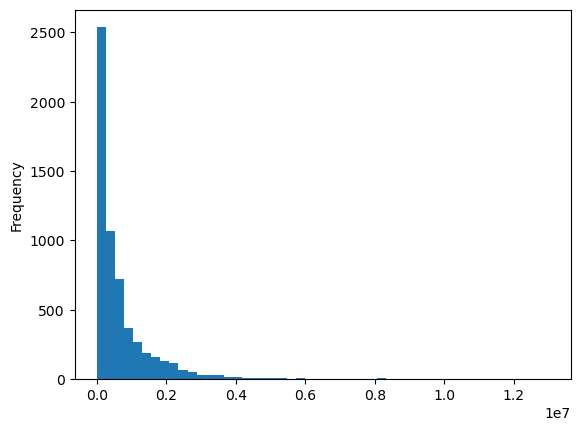

In [615]:
qualified_sales['adjusted_sales_price'].plot(kind = 'hist', bins = 50)

We want to look at how property values have changed over time.  This will help us get a better understanding of market trends.  In order to see more recent trends (which will be more applicable to our current market state), as well as to ensure readability, we will look at data from 2000 and on.

(array([1995., 2000., 2005., 2010., 2015., 2020., 2025., 2030.]),
 [Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025'),
  Text(2030.0, 0, '2030')])

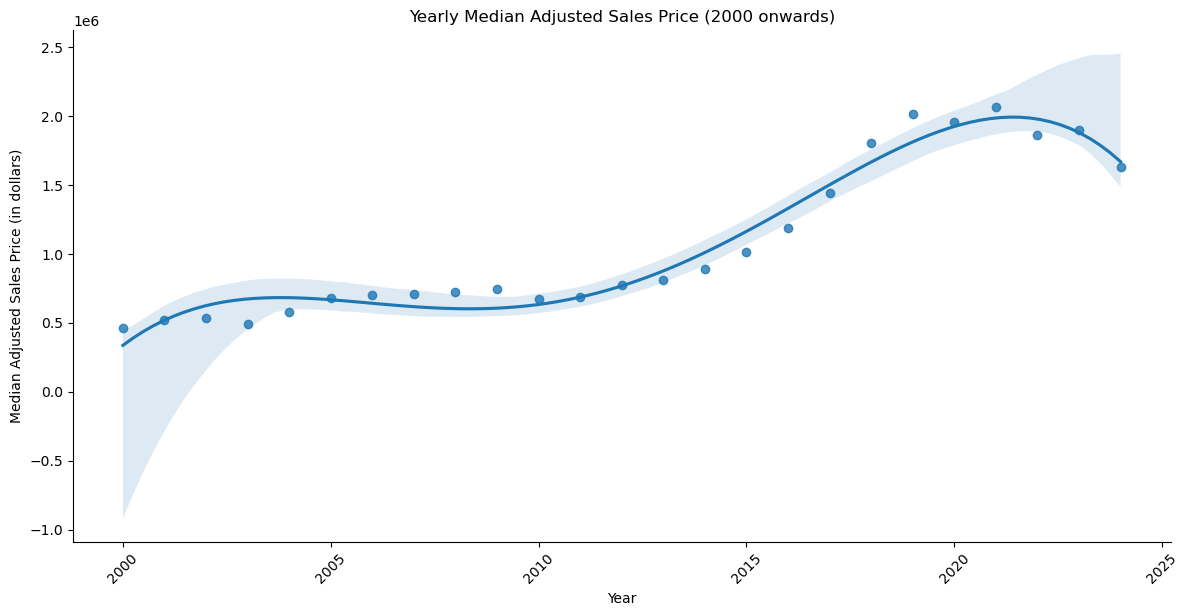

In [616]:
yearly_median_prices = qualified_sales.groupby(qualified_sales['date'].dt.year)['adjusted_sales_price'].median().reset_index()
yearly_median_prices = yearly_median_prices[yearly_median_prices['date'] >= 2000]

sns.lmplot(yearly_median_prices, x='date', y='adjusted_sales_price', aspect=2, height=6, order=4)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Median Adjusted Sales Price (in dollars)')
plt.title('Yearly Median Adjusted Sales Price (2000 onwards)')
plt.xticks(rotation=45)


It appears to resemble a third degree polynomial.  What this gives us a good general idea, but let's break it down by market area and section to see if they paint a better picture.

In [617]:
market_median_prices = qualified_sales.groupby(['market_area', qualified_sales['date'].dt.year])['adjusted_sales_price'].median().reset_index()
section_median_prices = qualified_sales.groupby(['section', qualified_sales['date'].dt.year])['adjusted_sales_price'].median().reset_index()

Text(0.5, 0.98, 'Median Adjusted Prices for Market Area and Section by Year')

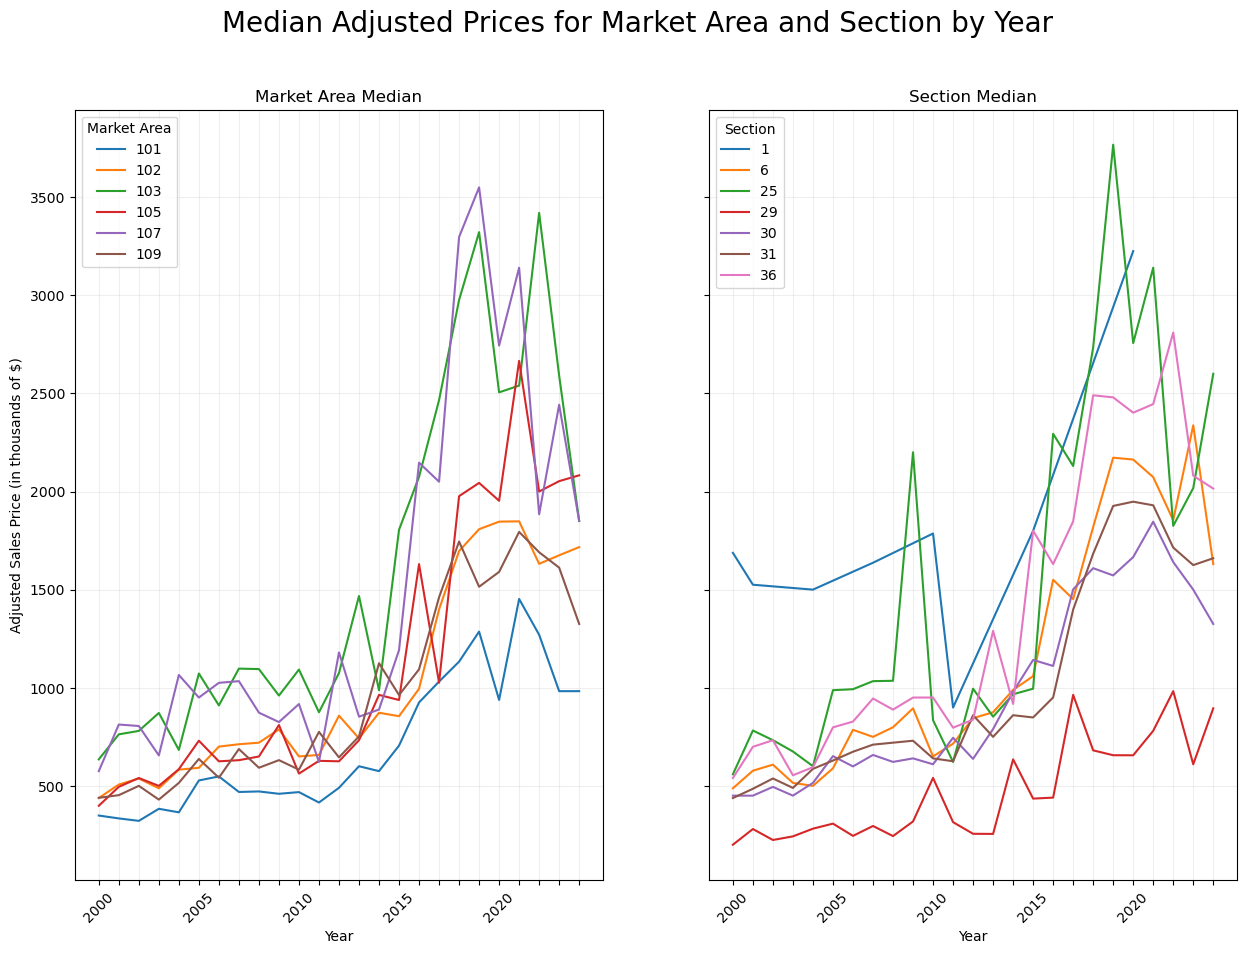

In [618]:
# Filter the data to include only years from 2000 onwards
market_median_prices_filtered = market_median_prices[market_median_prices['date'] >= 2000]
section_median_prices_filtered = section_median_prices[section_median_prices['date'] >= 2000]

fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

# Plot for Market Area Median Prices
for market_area, group in market_median_prices_filtered.groupby('market_area'):
    axes[0].plot(group['date'], group['adjusted_sales_price'] / 1e3, label=market_area)

# Plot for Section Median Prices
for section, group in section_median_prices_filtered.groupby('section'):
    axes[1].plot(group['date'], group['adjusted_sales_price'] / 1e3, label=section)

years = range(market_median_prices_filtered['date'].min(), market_median_prices_filtered['date'].max() + 1)

axes[0].set_title('Market Area Median')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Adjusted Sales Price (in thousands of $)')
axes[0].legend(title='Market Area', loc='upper left')
axes[0].set_xticks(years)
axes[0].set_xticklabels([year if year % 5 == 0 else '' for year in years], rotation=45)
axes[0].grid(True, alpha = 0.2)

axes[1].set_title('Section Median')
axes[1].set_xlabel('Year')
axes[1].legend(title='Section', loc='upper left')
axes[1].set_xticks(years)
axes[1].set_xticklabels([year if year % 5 == 0 else '' for year in years], rotation=45)
axes[1].grid(True, alpha = 0.2)

# Add a global title
fig.suptitle('Median Adjusted Prices for Market Area and Section by Year', fontsize=20)

We can see that while sections can be somewhat volatile, market area seems to retain its pricing heirachy well with 101 consistantly having the lowest sale prices and 103 and 107 consistantly having the highest.  From this we can infer that perhaps the market area plays an important role in home value.

Another aspect to consider is the quality of the home.  Is it well-kept?  Is it falling apart?  We would expect the higher quality homes we have higher sales prices.  Let's have a look.

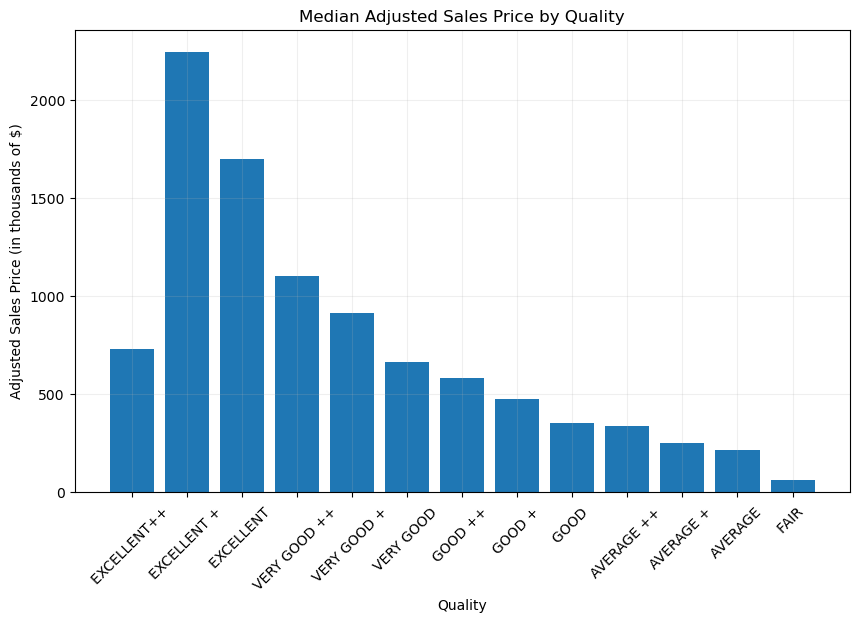

In [619]:
quality_median_prices = qualified_sales.groupby('quality')['adjusted_sales_price'].median().reset_index()

# Merge with the 'quality_code' to get numeric values for sorting
quality_codes = qualified_sales[['quality', 'quality_code']].drop_duplicates()
quality_median_prices = pd.merge(quality_median_prices,
                                 quality_codes,
                                 on = 'quality',
                                 how = 'left')

# Sort by 'quality_code' in descending order
quality_median_prices = quality_median_prices.sort_values(by='quality_code', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(quality_median_prices['quality'], quality_median_prices['adjusted_sales_price'] / 1e3)
plt.xlabel('Quality')
plt.ylabel('Adjusted Sales Price (in thousands of $)')
plt.title('Median Adjusted Sales Price by Quality')
plt.xticks(quality_median_prices['quality'], rotation=45)
plt.grid(True, alpha = 0.2)

Everything appears to behave as we expected except for the 'Excellent++' homes.  Let's take a further look at them.

In [620]:
qualified_sales[qualified_sales['quality'] == 'EXCELLENT++ '].describe()

,price,market_area,multiplier,adjusted_sales_price,total_finished_sqft,effective_year_built,age,quality_code,num_bed,num_bath,num_buildings,total_land_sqft,section,mill_levy
count,2.400000e+01,24.000000,4.000000,2.400000e+01,24.000000,24.00000,24.00000,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.748054e+06,105.833333,1.314700,3.104241e+06,3832.583333,2008.00000,16.00000,62.0,4.125000,4.093750,1.500000,17752.791667,24.458333,92.359000
std,3.317836e+06,1.857222,0.113705,3.847274e+06,1111.908970,9.31105,9.31105,0.0,1.034723,0.783014,0.978019,4691.957235,8.235549,8.667781
min,5.500000e+04,103.000000,1.170900,5.500000e+04,2224.000000,1989.00000,5.00000,62.0,3.000000,3.000000,1.000000,7060.000000,6.000000,86.359000
25%,3.362500e+05,103.000000,1.279575,3.362500e+05,3040.000000,2000.00000,8.00000,62.0,3.000000,3.687500,1.000000,17291.000000,25.000000,86.359000
50%,7.335000e+05,107.000000,1.319450,7.335000e+05,3931.500000,2011.00000,13.00000,62.0,4.000000,4.000000,1.000000,18357.000000,25.000000,86.359000
75%,6.033125e+06,107.000000,1.354575,6.551452e+06,4102.750000,2016.00000,24.00000,62.0,4.250000,4.437500,1.250000,19642.750000,25.000000,104.359000
max,1.100000e+07,107.000000,1.449000,1.100000e+07,6504.000000,2019.00000,35.00000,62.0,6.000000,5.750000,4.000000,23688.000000,36.000000,104.359000


In [621]:
qualified_sales[qualified_sales['quality'] == 'EXCELLENT + '].describe()

,price,market_area,multiplier,adjusted_sales_price,total_finished_sqft,effective_year_built,age,quality_code,num_bed,num_bath,num_buildings,total_land_sqft,section,mill_levy
count,3.100000e+01,31.000000,7.000000,3.100000e+01,31.000000,31.00000,31.00000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2.450858e+06,105.903226,1.331329,2.770110e+06,4119.451613,2008.83871,15.16129,61.0,4.612903,4.475806,1.193548,18879.129032,29.161290,87.520290
std,2.333071e+06,2.808972,0.152624,2.744674e+06,971.865486,9.06310,9.06310,0.0,0.882323,0.822483,0.401610,13026.487078,8.509198,4.495159
min,9.000000e+03,102.000000,1.175900,9.000000e+03,3139.000000,1990.00000,2.00000,61.0,3.000000,2.500000,1.000000,6464.000000,1.000000,86.359000
25%,4.125000e+05,103.000000,1.233450,4.125000e+05,3533.500000,2003.00000,10.00000,61.0,4.000000,4.000000,1.000000,11508.000000,27.500000,86.359000
50%,2.245800e+06,107.000000,1.309000,2.245800e+06,3606.000000,2009.00000,15.00000,61.0,5.000000,4.500000,1.000000,15974.000000,30.000000,86.359000
75%,4.137500e+06,109.000000,1.369350,4.535622e+06,4354.500000,2014.00000,21.00000,61.0,5.000000,5.250000,1.000000,16562.000000,36.000000,86.359000
max,8.250000e+06,109.000000,1.628800,8.250000e+06,6556.000000,2022.00000,34.00000,61.0,6.000000,6.000000,2.000000,56125.000000,36.000000,104.359000


The 'Excellent++' homes seem to have 'Excellent+' homes beat in most catagories except numbers of bedrooms and bathrooms.  This does not explain the considerably lower median price of 'Excellent' homes, and may require further analysis beyond our current scope.  Perhaps some of the prices of these homes were negotiated between family or friends that sold them at below market value.

Text(0.5, 0.98, 'Adjusted Sales Price vs Number of Bedrooms & Bathrooms')

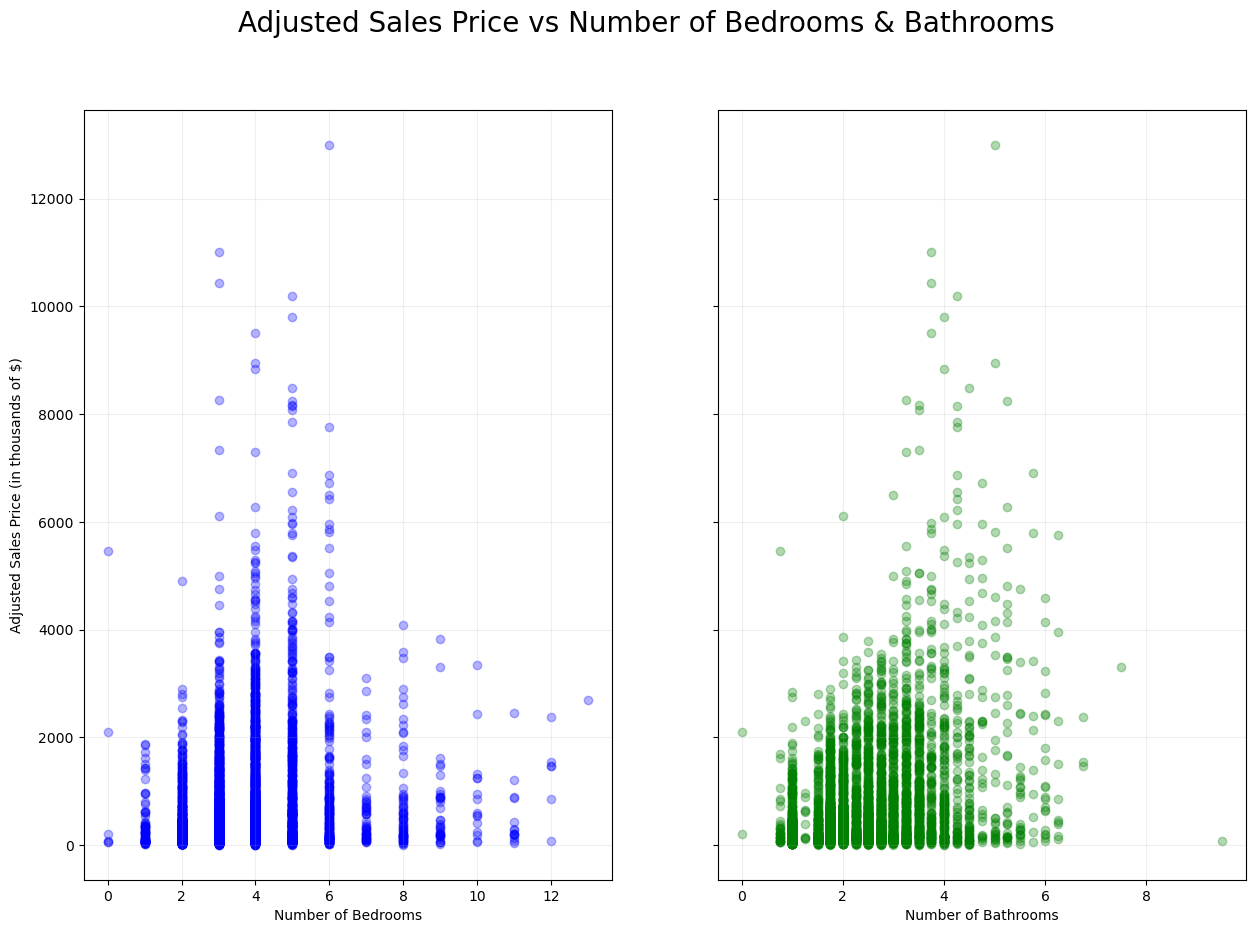

In [622]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

# Scatterplot for adjusted_sales_price vs num_bed
axes[0].scatter(qualified_sales['num_bed'], qualified_sales['adjusted_sales_price'] / 1e3, color='b', alpha=0.3)
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Adjusted Sales Price (in thousands of $)')
axes[0].grid(True, alpha=0.2)

# Scatterplot for adjusted_sales_price vs num_bath
axes[1].scatter(qualified_sales['num_bath'], qualified_sales['adjusted_sales_price'] / 1e3, color='g', alpha=0.3)
axes[1].set_xlabel('Number of Bathrooms')
axes[1].grid(True, alpha=0.2)

fig.suptitle('Adjusted Sales Price vs Number of Bedrooms & Bathrooms', fontsize=20)

While there is not a direct correlation to number of bedrooms/bathrooms to price, there seems to be a large number of homes being sold at medium to high prices with 5 bedrooms and 3.25 bathrooms.  Let's create KDEs to confirm.

Text(0.5, 0.98, 'Adjusted Sales Price vs Number of Bedrooms & Bathrooms')

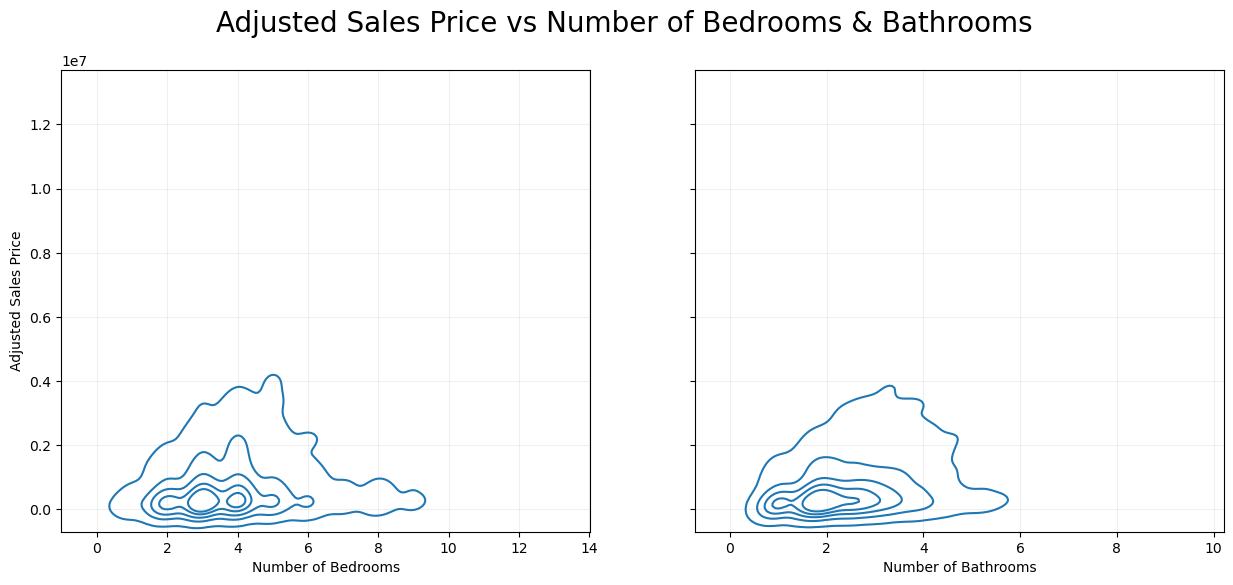

In [623]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for num_bed
sns.kdeplot(data=qualified_sales, x='num_bed', y='adjusted_sales_price', n_levels=6, ax=axes[0])
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Adjusted Sales Price')
axes[0].grid(True, alpha=0.2)

# Plot for num_bath
sns.kdeplot(data=qualified_sales, x='num_bath', y='adjusted_sales_price', n_levels=6, ax=axes[1])
axes[1].set_xlabel('Number of Bathrooms')
axes[1].grid(True, alpha=0.2)

fig.suptitle('Adjusted Sales Price vs Number of Bedrooms & Bathrooms', fontsize=20)

We can now see that the high density areas are at 3-4 bedrooms and 2 bathrooms.

Finally, let's create a pairplot to visualize relationships between other variables in our data frame

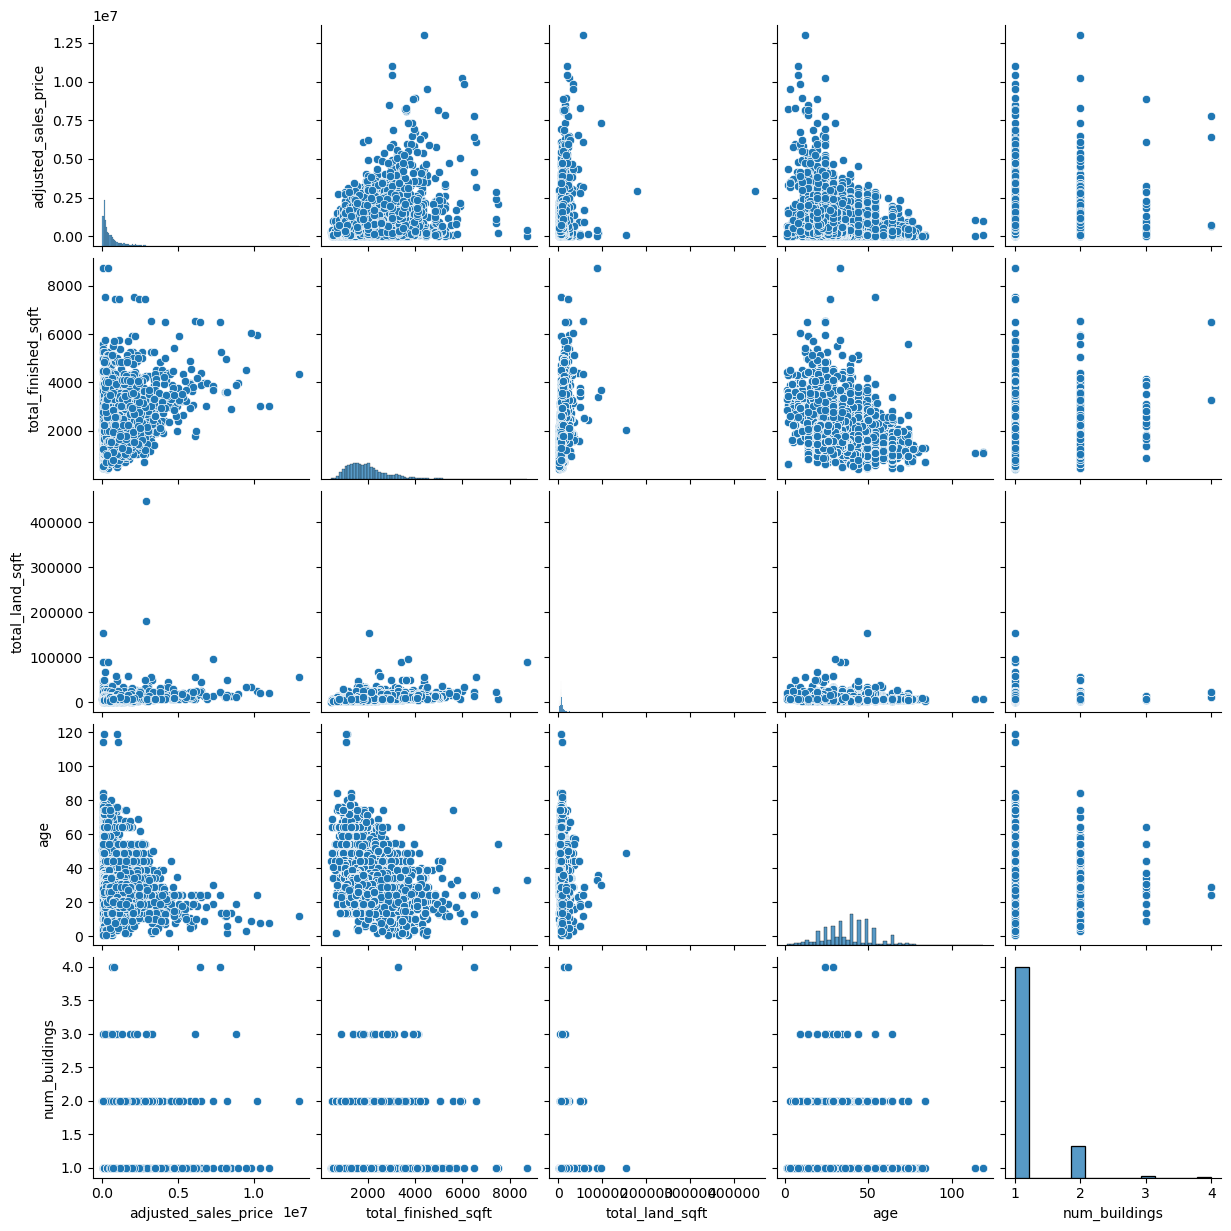

In [629]:
sns.pairplot(qualified_sales[['adjusted_sales_price','total_finished_sqft','total_land_sqft','age','num_buildings']])

################## BREAK ########################### </br>
The data frame with all the relevent variables for plotting (what they recommended plus I added a num_buildings column) is in `qualified_sales`